# Exploratory Data Analysis Using Youtube Video Data from Chanel Youtube channel

###  Scope of the project

I did this small project to test and practise on:

1. Youtube API and how to obtain video data.
2. Building, cleaning and preparing my "own" data set. 
2. Analyzing video data and verify different common "myths" about what makes a video do well on Youtube, for example:

    1. Does the number of likes and comments matter for a video to get more views?
    2. Does the video duration matter for views and interaction (likes/ comments)?
    3. Does title length matter for views?
    4. How many tags do good performing videos have? What are the common tags among these videos?
    5. Across all the creators I take into consideration, how often do they upload new videos? On which days in the week?


### Steps of the project

1. Obtain video meta data via Youtube API: create a developer key, request data and transform the responses into a usable data format.
2. Prepocess data and engineer additional features for analysis
3. Data analysis/Plotting
4. Conclusion

### Ethics of data source

According to Youtube API's guide, the usage of Youtube API is free of charge given that your application send requests within a quota limit. "The YouTube Data API uses a quota to ensure that developers use the service as intended and do not create applications that unfairly reduce service quality or limit access for others. " The default quota allocation for each application is 10,000 units per day, and you could request additional quota by completing a form to YouTube API Services if you reach the quota limit.

Since all data requested from Youtube API is public data (which everyone on the Internet can see on Youtube), there is no particular privacy issues as far as I am concerned. In addition, the data is obtained only for research purposes in this case and not for any commercial interests.

## Youtube API

In [1]:
# Import necessary modules and libraries
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON

In [2]:
# Define API key to access YouTube API
api_key = 'my_google_api_key'

In [3]:
# Specify the YouTube channel ID to retrieve information from - Channel of "CHANEL"
channel_id = ['UCclHSnngVTZK7LEOQAzcg1w']

In [4]:
# Define the name and version of the API to be used
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client (CHANEL)

youtube = build(
    api_service_name, api_version, developerKey = api_key)

In [5]:
# Fuction to loop into each item in the response and extract all the info in the channel before store it in a dictionary
def get_channel_stats(youtube, channel_id):
    
    # Initialize an empty list to store all the data retrieved from the API
    all_data = []
    
    # Define the request to the YouTube API to retrieve information for the specified channel ID
    request = youtube.channels().list(
        part = "snippet,contentDetails,statistics",
        id = channel_id
    )
    
    # Execute the request and store the response in a variable
    response = request.execute()
    
    #loop through items
    for item in response['items']:
        # Extract the desired data from the item and store it in a dictionary
        data = {'channelName':item['snippet']['title'],
                'subscribers':item['statistics']['subscriberCount'],
                'views':item['statistics']['viewCount'],
                'totalVideos':item['statistics']['videoCount'],
                'playlistId':item['contentDetails']['relatedPlaylists']['uploads']
        }
        # Append the dictionary to the list of all data retrieved
        all_data.append(data)
        
    # Create a pandas DataFrame to store the retrieved data and return it        
    return(pd.DataFrame(all_data))

In [6]:
# Call the get_channel_stats() function and print the resulting DataFrame
channel_stats = get_channel_stats(youtube, channel_id)
print(channel_stats)

In [8]:
playlist_id="UUclHSnngVTZK7LEOQAzcg1w"

# Define a function to retrieve the IDs of videos in a given YouTube playlist
def get_video_ids(youtube, playlist_id):
    
    # Initialize an empty list to store the video IDs
    video_ids = []

    # Define a request to the YouTube API to retrieve the video IDs for the specified playlist ID
    request = youtube.playlistItems().list(
        part = "snippet,contentDetails",
        playlistId = playlist_id,
        maxResults = 50
    )
    
    # Execute the request and store the response in a variable
    response = request.execute()

    # Extract the video IDs from the response and append them to the list
    for item in response ['items']:
        video_ids.append(item['contentDetails']['videoId'])
    
    # Check if there are more pages of results to retrieve
    nextPageToken = response.get('nextPageToken')
    while nextPageToken is not None:
        
        # Define a new request to retrieve the next page of results
        request = youtube.playlistItems().list(
            part = "snippet,contentDetails",
            playlistId = playlist_id,
            maxResults = 50,
            pageToken = nextPageToken # Important to add (Look at google documentation)
        )
        
        # Execute the request and store the response in a variable
        response = request.execute()

        # Extract the video IDs from the response and append them to the list
        for item in response ['items']:
            video_ids.append(item['contentDetails']['videoId'])
        
        # Check if there are more pages of results to retrieve
        nextPageToken = response.get('nextPageToken')
    
    return video_ids # Return the list of video IDs

In [9]:
video_ids = get_video_ids(youtube, playlist_id)

In [10]:
len(video_ids)

1277

In [11]:
def get_video_details(youtube, video_ids):
    
    all_video_info = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part = "snippet,contentDetails,statistics",
            id = ','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            stats_to_keep = {'snippet':['channelTitle','title','description','tags','publishedAt'],
                             'statistics':['viewCount','likeCount','favouriteCount','commentCount'],
                             'contentDetails':['duration','definition','caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for a in stats_to_keep.keys():
                for b in stats_to_keep[a]:
                    try:
                        video_info[b] = video[a][b]
                    except:
                        video_info[b] = None

            all_video_info.append(video_info)
            
    return pd.DataFrame(all_video_info)

In [12]:
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,zwPk1fMjoGg,CHANEL,The film of the CHANEL 2023 Eyewear Campaign —...,"In front of Karim Sadli’s lens, Vivienne Rohne...",None,2023-05-04T11:10:05Z,1469,222,None,0,PT39S,hd,false
1,cRFNVFF0J4Q,CHANEL,Zhou Xun and Margot Robbie: the two-way J12 In...,“What’s the most decisive second in your day?”...,None,2023-04-30T09:18:34Z,7578,670,None,73,PT1M,hd,true
2,nXTtjAn1z1g,CHANEL,J12. A lesson in eloquence with Zhou Xun and M...,,None,2023-04-30T09:04:16Z,2519,193,None,1,PT16S,hd,false
3,3UX0B7cSbnw,CHANEL,J12. A lesson in chance with Ali MacGraw and P...,,None,2023-04-29T09:23:53Z,2657,195,None,3,PT16S,hd,false
4,zmTkeNDcEBc,CHANEL,Ali MacGraw and Penélope Cruz: the two-way J12...,“Can you tell us the most decisive second in y...,None,2023-04-29T08:54:27Z,11206,718,None,56,PT1M,hd,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,o0x2LAsc40o,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 2, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T13:07:33Z,120428,689,None,43,PT1M19S,hd,true
1273,oG-nnDlnWrA,CHANEL,"BLEU de CHANEL, the 2010 film with Gaspard Ull...","The Film, with Gaspard Ulliel and directed By ...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T13:04:48Z,4595579,20996,None,1643,PT1M2S,hd,false
1274,AHnO6yPWFKI,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 1, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T13:04:18Z,250854,1587,None,104,PT2M16S,hd,true
1275,TYcVu3hcles,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 3, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T12:57:19Z,81126,421,None,10,PT1M10S,hd,true


## Data engineering

In [14]:
#checking null valuess
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [15]:
video_df.loc[video_df.likeCount.isna(),:]

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
30,JiZ_Y2huMYE,CHANEL,CHANEL Fall-Winter 2023/24 Ready-to-Wear Show ...,Around a larger-than-life white camellia awash...,None,2023-03-07T13:16:22Z,1019545,None,None,None,PT11M51S,hd,false
68,X2thJnrbIkU,CHANEL,The Final of the Spring-Summer 2023 Haute Cout...,,None,2023-01-24T18:54:04Z,13913,None,None,None,PT15S,hd,false
69,VeYZx6O6c2Q,CHANEL,CHANEL Spring-Summer 2023 Haute Couture Show —...,"As if on a village square, the stage is set fo...",None,2023-01-24T13:18:12Z,1016251,None,None,None,PT14M1S,hd,false
90,l4kadxGZuTY,CHANEL,2022/23 Métiers d'art CHANEL – DAKAR Show – CH...,,None,2022-12-05T09:18:20Z,7610,None,None,None,PT16S,hd,false
110,li6JvF_xvTA,CHANEL,Spring-Summer 2023 Ready-to-Wear — CHANEL Shows,"Within a cinematic background, brought to life...","[CHANEL, Paris, PFW, Spring Summer, Collection...",2022-10-04T12:18:00Z,766860,None,None,None,PT11M33S,hd,true
160,DKl1ml0KZ04,CHANEL,"CHANEL Fall-Winter 2022/23 Haute Couture Show,...",Unveiled at the Étrier de Paris equestrian cen...,None,2022-07-05T12:18:58Z,1543130,None,None,None,PT8M44S,hd,false
199,Hxev4f3ZZq0,CHANEL,The Film of the CHANEL Cruise 2022/23 Show — C...,"Held at Monte-Carlo Beach, the CHANEL Cruise 2...",None,2022-05-05T13:19:32Z,734172,None,None,None,PT9M45S,hd,false
227,koDtp6_tpJ0,CHANEL,"INFINITE TWEED, the Film of the CHANEL Fall-Wi...",In a luminous tribute to the landscape of the ...,None,2022-03-08T13:15:51Z,896043,None,None,None,PT10M37S,hd,false
232,ykYI5iMUwdk,CHANEL,The Film of the Spring-Summer 2022 Haute Coutu...,The CHANEL Spring-Summer 2022 Haute Couture sh...,None,2022-01-25T13:21:28Z,966653,None,None,None,PT11M1S,hd,false
249,ASw7rKUKZYQ,CHANEL,The 2021/22 Métiers d’art Show — CHANEL Shows,The CHANEL 2021/22 Métiers d’art show by Virgi...,None,2021-12-07T16:16:30Z,1100262,None,None,None,PT11M26S,hd,false


In [16]:
video_df.loc[video_df.favouriteCount.isna(),:]

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,zwPk1fMjoGg,CHANEL,The film of the CHANEL 2023 Eyewear Campaign —...,"In front of Karim Sadli’s lens, Vivienne Rohne...",None,2023-05-04T11:10:05Z,1469,222,None,0,PT39S,hd,false
1,cRFNVFF0J4Q,CHANEL,Zhou Xun and Margot Robbie: the two-way J12 In...,“What’s the most decisive second in your day?”...,None,2023-04-30T09:18:34Z,7578,670,None,73,PT1M,hd,true
2,nXTtjAn1z1g,CHANEL,J12. A lesson in eloquence with Zhou Xun and M...,,None,2023-04-30T09:04:16Z,2519,193,None,1,PT16S,hd,false
3,3UX0B7cSbnw,CHANEL,J12. A lesson in chance with Ali MacGraw and P...,,None,2023-04-29T09:23:53Z,2657,195,None,3,PT16S,hd,false
4,zmTkeNDcEBc,CHANEL,Ali MacGraw and Penélope Cruz: the two-way J12...,“Can you tell us the most decisive second in y...,None,2023-04-29T08:54:27Z,11206,718,None,56,PT1M,hd,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,o0x2LAsc40o,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 2, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T13:07:33Z,120428,689,None,43,PT1M19S,hd,true
1273,oG-nnDlnWrA,CHANEL,"BLEU de CHANEL, the 2010 film with Gaspard Ull...","The Film, with Gaspard Ulliel and directed By ...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T13:04:48Z,4595579,20996,None,1643,PT1M2S,hd,false
1274,AHnO6yPWFKI,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 1, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T13:04:18Z,250854,1587,None,104,PT2M16S,hd,true
1275,TYcVu3hcles,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 3, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T12:57:19Z,81126,421,None,10,PT1M10S,hd,true


In [17]:
#no video has favouriteCount, so we can drop this column
video_df = video_df.drop(columns="favouriteCount")

In [18]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
0,zwPk1fMjoGg,CHANEL,The film of the CHANEL 2023 Eyewear Campaign —...,"In front of Karim Sadli’s lens, Vivienne Rohne...",None,2023-05-04T11:10:05Z,1469,222,0,PT39S,hd,false
1,cRFNVFF0J4Q,CHANEL,Zhou Xun and Margot Robbie: the two-way J12 In...,“What’s the most decisive second in your day?”...,None,2023-04-30T09:18:34Z,7578,670,73,PT1M,hd,true
2,nXTtjAn1z1g,CHANEL,J12. A lesson in eloquence with Zhou Xun and M...,,None,2023-04-30T09:04:16Z,2519,193,1,PT16S,hd,false
3,3UX0B7cSbnw,CHANEL,J12. A lesson in chance with Ali MacGraw and P...,,None,2023-04-29T09:23:53Z,2657,195,3,PT16S,hd,false
4,zmTkeNDcEBc,CHANEL,Ali MacGraw and Penélope Cruz: the two-way J12...,“Can you tell us the most decisive second in y...,None,2023-04-29T08:54:27Z,11206,718,56,PT1M,hd,true
...,...,...,...,...,...,...,...,...,...,...,...,...
1272,o0x2LAsc40o,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 2, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T13:07:33Z,120428,689,43,PT1M19S,hd,true
1273,oG-nnDlnWrA,CHANEL,"BLEU de CHANEL, the 2010 film with Gaspard Ull...","The Film, with Gaspard Ulliel and directed By ...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T13:04:48Z,4595579,20996,1643,PT1M2S,hd,false
1274,AHnO6yPWFKI,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 1, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T13:04:18Z,250854,1587,104,PT2M16S,hd,true
1275,TYcVu3hcles,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 3, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05T12:57:19Z,81126,421,10,PT1M10S,hd,true


In [19]:
#checking data types. It doesn't make sense... viewCount, likeCount, commentCount shold be numeric/int, so I'll change it
video_df.dtypes

video_id        object
channelTitle    object
title           object
description     object
tags            object
publishedAt     object
viewCount       object
likeCount       object
commentCount    object
duration        object
definition      object
caption         object
dtype: object

In [20]:
int_columns = ['viewCount','likeCount','commentCount']
video_df[int_columns] = video_df[int_columns].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [21]:
video_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
viewCount       float64
likeCount       float64
commentCount    float64
duration         object
definition       object
caption          object
dtype: object

In [22]:
#create a column for "publishing day of the week" from "publishedAt"
from dateutil import parser
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['publishingDay'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [23]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,pushblishDay
0,zwPk1fMjoGg,CHANEL,The film of the CHANEL 2023 Eyewear Campaign —...,"In front of Karim Sadli’s lens, Vivienne Rohne...",None,2023-05-04 11:10:05+00:00,1469.0,222.0,0.0,PT39S,hd,false,Thursday
1,cRFNVFF0J4Q,CHANEL,Zhou Xun and Margot Robbie: the two-way J12 In...,“What’s the most decisive second in your day?”...,None,2023-04-30 09:18:34+00:00,7578.0,670.0,73.0,PT1M,hd,true,Sunday
2,nXTtjAn1z1g,CHANEL,J12. A lesson in eloquence with Zhou Xun and M...,,None,2023-04-30 09:04:16+00:00,2519.0,193.0,1.0,PT16S,hd,false,Sunday
3,3UX0B7cSbnw,CHANEL,J12. A lesson in chance with Ali MacGraw and P...,,None,2023-04-29 09:23:53+00:00,2657.0,195.0,3.0,PT16S,hd,false,Saturday
4,zmTkeNDcEBc,CHANEL,Ali MacGraw and Penélope Cruz: the two-way J12...,“Can you tell us the most decisive second in y...,None,2023-04-29 08:54:27+00:00,11206.0,718.0,56.0,PT1M,hd,true,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,o0x2LAsc40o,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 2, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 13:07:33+00:00,120428.0,689.0,43.0,PT1M19S,hd,true,Thursday
1273,oG-nnDlnWrA,CHANEL,"BLEU de CHANEL, the 2010 film with Gaspard Ull...","The Film, with Gaspard Ulliel and directed By ...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 13:04:48+00:00,4595579.0,20996.0,1643.0,PT1M2S,hd,false,Thursday
1274,AHnO6yPWFKI,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 1, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 13:04:18+00:00,250854.0,1587.0,104.0,PT2M16S,hd,true,Thursday
1275,TYcVu3hcles,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 3, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 12:57:19+00:00,81126.0,421.0,10.0,PT1M10S,hd,true,Thursday


In [24]:
import isodate
video_df['duration'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x)) 
video_df['durationSecs'] = video_df['duration'].apply(lambda x: x.total_seconds()) 

In [25]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,pushblishDay,durationSecs
0,zwPk1fMjoGg,CHANEL,The film of the CHANEL 2023 Eyewear Campaign —...,"In front of Karim Sadli’s lens, Vivienne Rohne...",None,2023-05-04 11:10:05+00:00,1469.0,222.0,0.0,0 days 00:00:39,hd,false,Thursday,39.0
1,cRFNVFF0J4Q,CHANEL,Zhou Xun and Margot Robbie: the two-way J12 In...,“What’s the most decisive second in your day?”...,None,2023-04-30 09:18:34+00:00,7578.0,670.0,73.0,0 days 00:01:00,hd,true,Sunday,60.0
2,nXTtjAn1z1g,CHANEL,J12. A lesson in eloquence with Zhou Xun and M...,,None,2023-04-30 09:04:16+00:00,2519.0,193.0,1.0,0 days 00:00:16,hd,false,Sunday,16.0
3,3UX0B7cSbnw,CHANEL,J12. A lesson in chance with Ali MacGraw and P...,,None,2023-04-29 09:23:53+00:00,2657.0,195.0,3.0,0 days 00:00:16,hd,false,Saturday,16.0
4,zmTkeNDcEBc,CHANEL,Ali MacGraw and Penélope Cruz: the two-way J12...,“Can you tell us the most decisive second in y...,None,2023-04-29 08:54:27+00:00,11206.0,718.0,56.0,0 days 00:01:00,hd,true,Saturday,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,o0x2LAsc40o,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 2, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 13:07:33+00:00,120428.0,689.0,43.0,0 days 00:01:19,hd,true,Thursday,79.0
1273,oG-nnDlnWrA,CHANEL,"BLEU de CHANEL, the 2010 film with Gaspard Ull...","The Film, with Gaspard Ulliel and directed By ...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 13:04:48+00:00,4595579.0,20996.0,1643.0,0 days 00:01:02,hd,false,Thursday,62.0
1274,AHnO6yPWFKI,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 1, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 13:04:18+00:00,250854.0,1587.0,104.0,0 days 00:02:16,hd,true,Thursday,136.0
1275,TYcVu3hcles,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 3, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 12:57:19+00:00,81126.0,421.0,10.0,0 days 00:01:10,hd,true,Thursday,70.0


In [26]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [27]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,pushblishDay,durationSecs,tagCount
0,zwPk1fMjoGg,CHANEL,The film of the CHANEL 2023 Eyewear Campaign —...,"In front of Karim Sadli’s lens, Vivienne Rohne...",None,2023-05-04 11:10:05+00:00,1469.0,222.0,0.0,0 days 00:00:39,hd,false,Thursday,39.0,0
1,cRFNVFF0J4Q,CHANEL,Zhou Xun and Margot Robbie: the two-way J12 In...,“What’s the most decisive second in your day?”...,None,2023-04-30 09:18:34+00:00,7578.0,670.0,73.0,0 days 00:01:00,hd,true,Sunday,60.0,0
2,nXTtjAn1z1g,CHANEL,J12. A lesson in eloquence with Zhou Xun and M...,,None,2023-04-30 09:04:16+00:00,2519.0,193.0,1.0,0 days 00:00:16,hd,false,Sunday,16.0,0
3,3UX0B7cSbnw,CHANEL,J12. A lesson in chance with Ali MacGraw and P...,,None,2023-04-29 09:23:53+00:00,2657.0,195.0,3.0,0 days 00:00:16,hd,false,Saturday,16.0,0
4,zmTkeNDcEBc,CHANEL,Ali MacGraw and Penélope Cruz: the two-way J12...,“Can you tell us the most decisive second in y...,None,2023-04-29 08:54:27+00:00,11206.0,718.0,56.0,0 days 00:01:00,hd,true,Saturday,60.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,o0x2LAsc40o,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 2, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 13:07:33+00:00,120428.0,689.0,43.0,0 days 00:01:19,hd,true,Thursday,79.0,19
1273,oG-nnDlnWrA,CHANEL,"BLEU de CHANEL, the 2010 film with Gaspard Ull...","The Film, with Gaspard Ulliel and directed By ...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 13:04:48+00:00,4595579.0,20996.0,1643.0,0 days 00:01:02,hd,false,Thursday,62.0,38
1274,AHnO6yPWFKI,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 1, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 13:04:18+00:00,250854.0,1587.0,104.0,0 days 00:02:16,hd,true,Thursday,136.0,19
1275,TYcVu3hcles,CHANEL,"BLEU de CHANEL with Gaspard Ulliel, Behind The...","Making of BLEU DE CHANEL Day 3, with Gaspard U...","[BLEU DE CHANEL, BLEU, CHANEL, Fragrance, Maki...",2010-08-05 12:57:19+00:00,81126.0,421.0,10.0,0 days 00:01:10,hd,true,Thursday,70.0,19


## PLOTTING

We perform some visualizations using various plotting libraries such as seaborn and matplotlib to gain insights into the data.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

### Bar graph to show the top 10 most and least viewed videos

Looking at the following two graphs, one can certainly see that Chanel is more famous for its perfumes than for its watches.

<Axes: xlabel='viewCount', ylabel='title'>

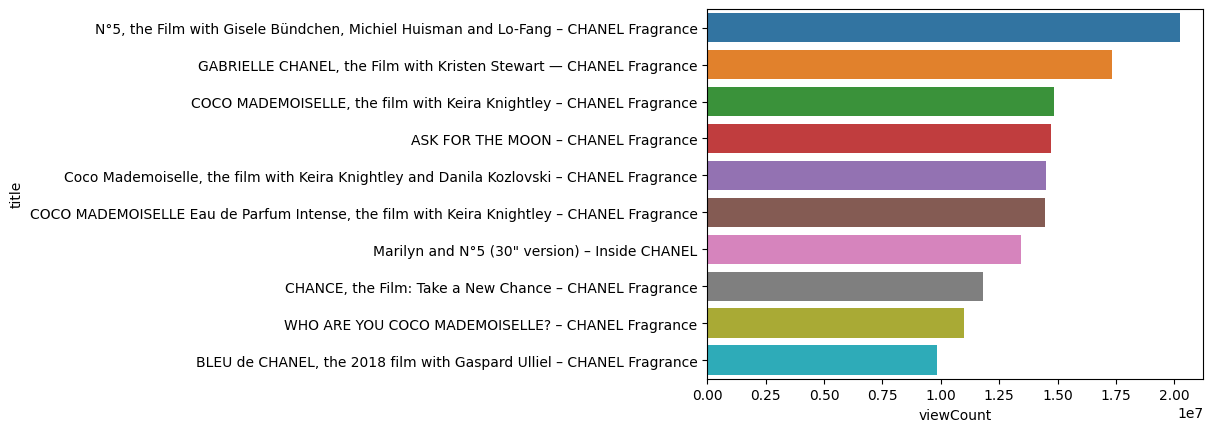

In [29]:
sns.barplot(y = 'title', x = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:10])

<Axes: xlabel='viewCount', ylabel='title'>

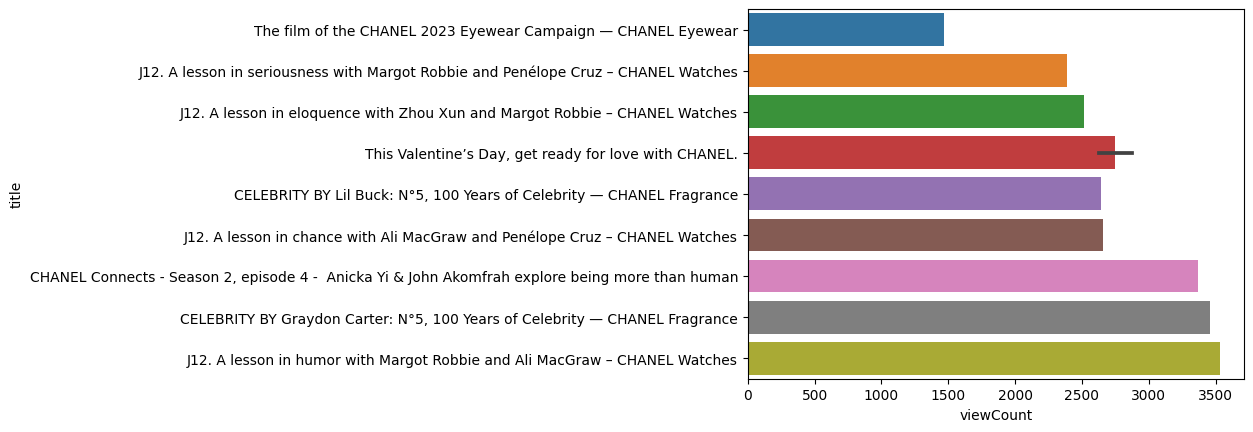

In [30]:
sns.barplot(y = 'title', x = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:10])

### Scatter plots
In the plots below, it can be observed that the number of views and number of comments/ likes are not strongly correlated with each other.
This is probably due to the fact that many of the channel's videos are used for advertising purposes. Furthermore, we are considering a YouTube channel of an already established fashion brand, which is why the engagement of comments and likes can and is disconnected from the views of the video.

<Axes: xlabel='likeCount', ylabel='viewCount'>

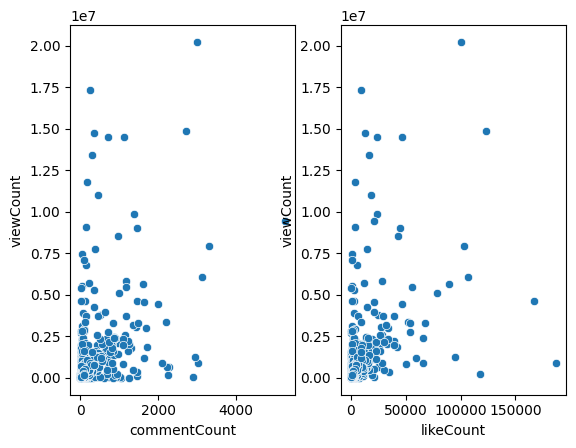

In [31]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

### Box plot to show the distribution of views across channels

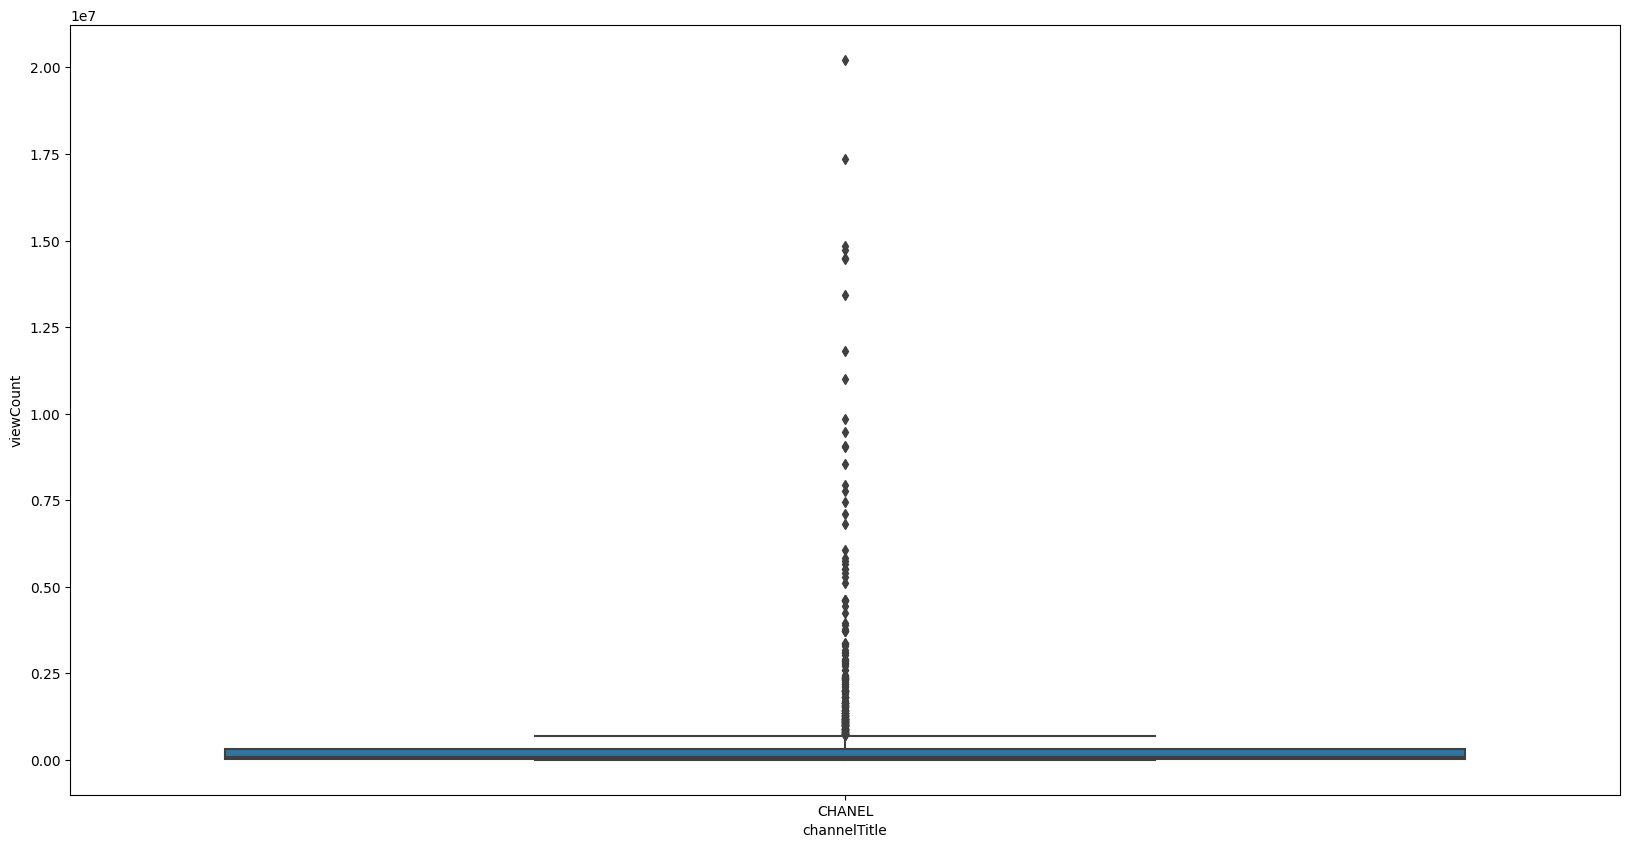

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x=video_df.channelTitle,y=video_df.viewCount)
plt.show()

### Histogram to show the distribution of the number of videos by their duration time

Most of the videos have a duration of less than 2 minutes. All these videos are certainly created as advertisements for the company's numerous products, and this is also the main objective of the YouTube channel.

<Axes: xlabel='durationSecs', ylabel='Count'>

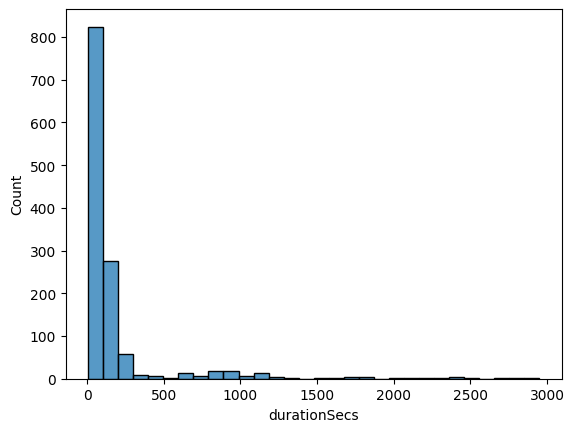

In [33]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

### Scatter plot to show the relationship between video duration and views

As a trend in all social media, shorter videos get more views for many reasons. The attention span of the viewer in particular and the nature of the channel's content (mainly brand product ads), only "a few fans" linger to watch the longer videos such as "behind the scenes of fashion week"

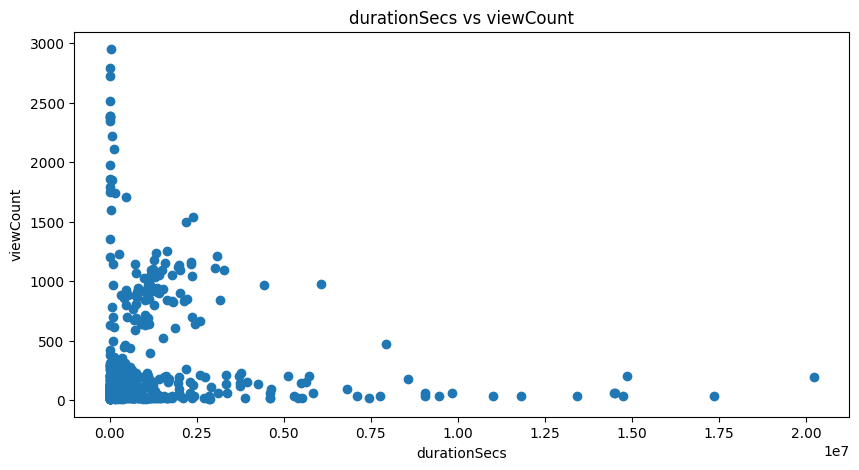

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(video_df.viewCount,video_df.durationSecs)
plt.title("durationSecs vs viewCount")
plt.xlabel("durationSecs")
plt.ylabel("viewCount")
plt.show()

### Bar graph to show the distribution of videos published on each day of the week

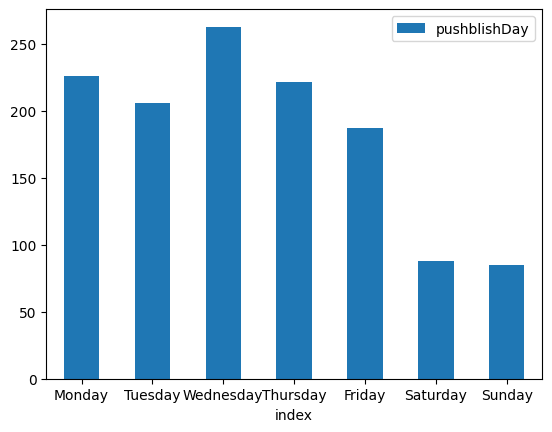

In [35]:
day_df = pd.DataFrame(video_df['publishingDay'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='publishingDay', rot=0)

### Scatter plot to show the relationship between views and publishing day

Apparently, the day of publication does not have much influence on the number of views of the video. Apart from weekend videos that clearly perform worse, other days are more or less comparable, so the success of a video is to be found in other reasons.

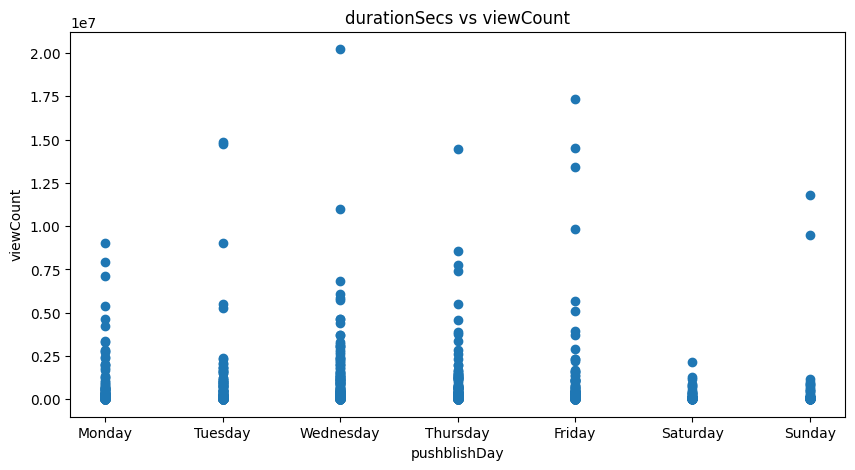

In [42]:
# Define the day of the week order
day_order = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}

# Map the day of the week to the numerical value
video_df['publishingDayNum'] = video_df['publishingDay'].map(day_order)

# Sort the DataFrame by the numerical value of the pushblishDayNum column
video_df = video_df.sort_values('publishingDayNum')

# Create the scatter plot
plt.figure(figsize=(10,5))
plt.scatter(video_df.pushblishDay, video_df.viewCount)
plt.title("durationSecs vs viewCount")
plt.xlabel("publishingDay")
plt.ylabel("viewCount")
plt.show()

# Remove the temporary column
video_df = video_df.drop(columns=['publishingDayNum'])

## Conclusion

Unfortunately, the brief analysis of this case study did not yield many answers. I am aware that this is mainly due to the nature of the channel examined. This type of analysis is much more useful for channels of real youtubers who use the platform as their main source of expression and not as a mere marketing tool.

In conclusion, despite the brief analysis, I am happy with the result as my first experiment with the use of api.